# <span style="color:yellow">ΚΑΘΟΡΙΣΜΟΣ ΤΟΥ DIRECTORY ΟΠΟΥ ΒΡΙΣΚΕΤΑΙ ΤΟ ΑΡΧΕΙΟ

In [116]:
pwd #Καθορίζει το path file του αρχείου που εκτελείται

'c:\\Users\\Kosta\\Desktop\\Python_Projects\\JupyterProject\\LINEAR REGRESSION_Model_1'

# <span style="color:yellow">ΕΙΣΑΓΩΓΗ ΤΩΝ ΑΠΑΡΑΙΤΡΗΤΩΝ ΒΙΒΛΙΟΘΗΚΩΝ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΚΩΔΙΚΑ

In [117]:
#Βιβλιοθήκες για την εισαγωγή και επεξεργασία των δεδομένων
import warnings
import numpy as np
import pandas as pd

#Βιβλιοθήκες για την εκτύπωση των διαγραμμάτων
import seaborn as sns
import matplotlib.cm as cm
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Βιβλιοθήκες για εκπαίδευση μοντέλων μηχανικής μάθησης
from arch import arch_model
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# <span style="color:yellow">ΚΑΘΟΡΙΣΜΟΣ ΑΚΡΙΒΕΙΑΣ ΤΟΥ ΜΟΝΤΕΛΟΥ

In [118]:
#Καθορισμός ακριβείας του μοντέλου
pd.set_option("display.precision", 2)

# <span style="color:yellow">ΕΙΣΑΓΩΓΗ ΚΑΙ ΕΠΕΞΕΡΓΑΣΙΑ ΤΟΥ ΑΡΧΕΙΟΥ ΠΟΥ ΕΙΝΑΙ ΑΠΑΡΑΙΤΗΤΟ ΓΙΑ ΤΗΝ ΕΚΤΕΛΕΣΗ ΤΟΥ ΑΛΓΟΡΙΘΜΟΥ

In [119]:
#Αναγνώριση του αρχείου και εισαγωγή του στο πρόγραμμα
df = pd.read_excel('../FINAL_DATA/Greece_Values.xlsx')

#Δημιουργία DataFrame
df.head()

#Δίνει την εκτύπωση των πέντε πρώτων στηλών των δεδομένων
print(df.head())

        Date  Daily Volume of Transactions  Daily Closing Prices  \
0 2023-12-29                      14325455               1293.14   
1 2023-12-28                       9359690               1285.65   
2 2023-12-27                      11932640               1293.19   
3 2023-12-22                      17777385               1290.89   
4 2023-12-21                      12093042               1298.56   

   20-Day Moving Average  Daily Position with Bollinger Bands  \
0                1284.35                                 0.70   
1                1283.30                                 0.53   
2                1281.91                                 0.73   
3                1280.30                                 0.70   
4                1278.40                                 0.87   

   Historical Volatility    RSI  GDP Growth  Daily Returns  \
0                   6.81  61.55        2.01           0.58   
1                   6.75  61.15        2.01          -0.58   
2             

# <span style="color:yellow">ΣΥΝΟΠΤΙΚΗ ΠΑΡΟΥΣΙΑΣΗ ΤΩΝ ΔΕΔΟΜΕΝΩΝ

In [81]:
#Επιστρέφει το σύνολο των γραμμών του αρχείου στο οποίο βρίσκονται τα δεδομένα
len(df)

2626

In [82]:
#Επιστρέφει τα ονόματα των στηλών του αρχείου στο οποίο βρίσκονται τα δεδομένα
df.columns

Index(['Date', 'Daily Volume of Transactions', 'Daily Closing Prices',
       '20-Day Moving Average', 'Daily Position with Bollinger Bands',
       'Historical Volatility', 'RSI', 'GDP Growth', 'Daily Returns',
       'Exponential Moving Average (EMA)',
       '7- Day Standard Deviation of Daily Returns'],
      dtype='object')

In [83]:
# Υποθέτουμε ότι το DataFrame ονομάζεται 'data'
total_values = df.size  # Επιστρέφει το σύνολο όλων των τιμών στο DataFrame
print(f"Σύνολο δεδομένων στο DataFrame: {total_values}")

Σύνολο δεδομένων στο DataFrame: 28886


In [84]:
#Δίνει τον τύπο των δεδομένων που περιέχονται στις στήλες του αρχείου. To dataset αποτελείται από 9 στήλες από τις οποίες οι οκτώ περιέχουν αριθμητικά δεδομένα και η μια ημερομηνία
df.dtypes

Date                                          datetime64[ns]
Daily Volume of Transactions                           int64
Daily Closing Prices                                 float64
20-Day Moving Average                                float64
Daily Position with Bollinger Bands                  float64
Historical Volatility                                float64
RSI                                                  float64
GDP Growth                                           float64
Daily Returns                                        float64
Exponential Moving Average (EMA)                     float64
7- Day Standard Deviation of Daily Returns           float64
dtype: object

In [85]:
# Εκτυπώνει το όνομα των στηλών και τον τύπο των δεδομένων που περιέχουν
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2626 entries, 0 to 2625
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Date                                        2626 non-null   datetime64[ns]
 1   Daily Volume of Transactions                2626 non-null   int64         
 2   Daily Closing Prices                        2626 non-null   float64       
 3   20-Day Moving Average                       2626 non-null   float64       
 4   Daily Position with Bollinger Bands         2626 non-null   float64       
 5   Historical Volatility                       2626 non-null   float64       
 6   RSI                                         2626 non-null   float64       
 7   GDP Growth                                  2626 non-null   float64       
 8   Daily Returns                               2626 non-null   float64       
 9   Exponent

In [86]:
#Εκτυπώνει το είδος της κάθε μεταβλητής του dataset
print(df.dtypes)

Date                                          datetime64[ns]
Daily Volume of Transactions                           int64
Daily Closing Prices                                 float64
20-Day Moving Average                                float64
Daily Position with Bollinger Bands                  float64
Historical Volatility                                float64
RSI                                                  float64
GDP Growth                                           float64
Daily Returns                                        float64
Exponential Moving Average (EMA)                     float64
7- Day Standard Deviation of Daily Returns           float64
dtype: object


In [87]:
#Δίνει τον πίνακα συσχέτισης των μεταβλητών του dataset
df.corr()

,Date,Daily Volume of Transactions,Daily Closing Prices,20-Day Moving Average,Daily Position with Bollinger Bands,Historical Volatility,RSI,GDP Growth,Daily Returns,Exponential Moving Average (EMA),7- Day Standard Deviation of Daily Returns
Date,1.00,-0.40,0.10,0.09,0.11,-0.37,0.13,3.24e-01,1.88e-02,0.10,-0.32
Daily Volume of Transactions,-0.40,1.00,-0.18,-0.17,-0.06,0.38,-0.07,-1.24e-01,2.16e-02,-0.17,0.39
Daily Closing Prices,0.10,-0.18,1.00,0.98,0.14,-0.19,0.18,2.29e-01,4.05e-02,0.99,-0.16
20-Day Moving Average,0.09,-0.17,0.98,1.00,-0.04,-0.14,0.02,2.24e-01,-3.39e-02,1.00,-0.08
Daily Position with Bollinger Bands,0.11,-0.06,0.14,-0.04,1.00,-0.16,0.78,4.75e-02,3.84e-01,0.02,-0.25
Historical Volatility,-0.37,0.38,-0.19,-0.14,-0.16,1.00,-0.28,-3.53e-01,-1.41e-02,-0.17,0.82
RSI,0.13,-0.07,0.18,0.02,0.78,-0.28,1.00,3.22e-02,1.96e-01,0.08,-0.32
GDP Growth,0.32,-0.12,0.23,0.22,0.05,-0.35,0.03,1.00e+00,8.21e-03,0.23,-0.30
Daily Returns,0.02,0.02,0.04,-0.03,0.38,-0.01,0.20,8.21e-03,1.00e+00,-0.03,-0.03
Exponential Moving Average (EMA),0.10,-0.17,0.99,1.00,0.02,-0.17,0.08,2.26e-01,-2.55e-02,1.00,-0.11


# <span style="color:yellow">ΠΡΟΕΤΟΙΜΑΣΙΑ ΤΩΝ ΔΕΟΔΜΕΝΩΝ

In [88]:
# Έλεγχος για ελλείπουσες τιμές
missing_values = df.isnull().sum()

# Εμφάνιση των αποτελεσμάτων
print("Ελλείπουσες τιμές ανά στήλη:")
print(missing_values)

Ελλείπουσες τιμές ανά στήλη:
Date                                          0
Daily Volume of Transactions                  0
Daily Closing Prices                          0
20-Day Moving Average                         0
Daily Position with Bollinger Bands           0
Historical Volatility                         0
RSI                                           0
GDP Growth                                    0
Daily Returns                                 0
Exponential Moving Average (EMA)              0
7- Day Standard Deviation of Daily Returns    0
dtype: int64


In [89]:
# Υπολογισμός Z-Scores για αριθμητικές στήλες
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)

# Καθορισμός ακραιών τιμών (π.χ., όριο Z-Score > |3|)
threshold = 3
outliers = (z_scores.abs() > threshold)

# Εμφάνιση ακραίων τιμών
print("Ακραιες τιμές ανά στήλη:")
for column in outliers.columns:
    print(f"\nΣτήλη: {column}")
    print(df.loc[outliers[column], column])

Ακραιες τιμές ανά στήλη:

Στήλη: Daily Volume of Transactions
650     263321063
896     461522585
1259    260964872
1555    259389020
1872    280884463
1894    269082795
1895    294113209
1904    283025983
1936    390550668
1961    268604777
1963    260828009
1977    335465540
1990    435327799
1994    342259737
1995    722510394
1996    437506197
1997    404001339
1998    553687559
1999    682670858
2000    313871713
2001    313640591
2008    411406657
2014    362831335
2017    326384051
2018    261177559
2019    350177257
2020    320448564
2021    366229387
2023    289886146
2024    423909229
2026    263904362
2028    272924297
2029    412272184
2030    348071245
2068    282835927
2091    405145809
2092    288759380
2114    294712250
2138    277915252
2152    449082639
2154    283282746
2157    379896328
2158    657688457
2176    333840070
2177    371599678
2178    360228583
2182    325299422
2189    375926053
2190    394768518
2192    256869341
2193    305183821
2194    317539967
21

In [90]:
# Φιλτράρισμα δεδομένων για απομάκρυνση γραμμών με ακραίες τιμές
df_without_outliers = df[~(z_scores.abs() > threshold).any(axis=1)]

print("\nDataFrame μετά την αφαίρεση ακραίων τιμών:")
print(df_without_outliers)


DataFrame μετά την αφαίρεση ακραίων τιμών:
           Date  Daily Volume of Transactions  Daily Closing Prices  \
0    2023-12-29                      14325455               1293.14   
1    2023-12-28                       9359690               1285.65   
2    2023-12-27                      11932640               1293.19   
3    2023-12-22                      17777385               1290.89   
4    2023-12-21                      12093042               1298.56   
...         ...                           ...                   ...   
2620 2013-05-13                     113156012               1065.22   
2621 2013-05-10                      96144894               1034.39   
2622 2013-05-09                      94136464               1066.29   
2624 2013-05-02                      46208066                983.64   
2625 2013-04-30                      65289426                974.09   

      20-Day Moving Average  Daily Position with Bollinger Bands  \
0                   1284.35        

In [91]:
# Μετατροπή της στήλης 'Date' σε datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d',
                            errors='coerce')  # Προσαρμόστε το format ανάλογα με τη μορφή της ημερομηνίας σας

# Έλεγχος αν η μετατροπή ήταν επιτυχής
print(df['Date'].head())

# Προαιρετικά: Ρύθμιση της στήλης 'Date' ως index
df.set_index('Date', inplace=True)

# Έλεγχος του DataFrame
print(df.head())

0   2023-12-29
1   2023-12-28
2   2023-12-27
3   2023-12-22
4   2023-12-21
Name: Date, dtype: datetime64[ns]
            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2023-12-29                      14325455               1293.14   
2023-12-28                       9359690               1285.65   
2023-12-27                      11932640               1293.19   
2023-12-22                      17777385               1290.89   
2023-12-21                      12093042               1298.56   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2023-12-29                1284.35                                 0.70   
2023-12-28                1283.30                                 0.53   
2023-12-27                1281.91                                 0.73   
2023-12-22                1280.30                         

In [92]:
df.index # Output: DatetimeIndex([...], dtype='datetime64[ns]', freq=None)

df = df.sort_index()
# Το index ταξινομείται, και το DataFrame είναι έτοιμο για χρήση ταξινομημένο.

print(df.head())

            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2013-04-30                      65289426                974.09   
2013-05-02                      46208066                983.64   
2013-05-08                      93343468               1043.28   
2013-05-09                      94136464               1066.29   
2013-05-10                      96144894               1034.39   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2013-04-30                 909.08                                 0.81   
2013-05-02                 914.97                                 0.83   
2013-05-08                 922.26                                 1.06   
2013-05-09                 932.29                                 1.09   
2013-05-10                 944.46                                 0.92   

            Histor

# <span style="color:yellow">Προετοιμασία δεδομένων και κανονικοποίηση

In [93]:
# Επιλογή αριθμητικών στηλών για κανονικοποίηση
numeric_columns = df.select_dtypes(include=[np.number])

# Εφαρμογή κανονικοποίησης Z-Score
df_normalized = numeric_columns.apply(zscore)

# Επιστροφή μη αριθμητικών στηλών στο τελικό DataFrame (αν υπάρχουν)
for col in df.select_dtypes(exclude=[np.number]).columns:
    df_normalized[col] = df[col]

# Επισκόπηση κανονικοποιημένου DataFrame
print("Κανονικοποιημένα δεδομένα (Z-Score):")
print(df_normalized.head())

Κανονικοποιημένα δεδομένα (Z-Score):
            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2013-04-30                          0.10                  0.61   
2013-05-02                         -0.20                  0.66   
2013-05-08                          0.54                  0.95   
2013-05-09                          0.55                  1.06   
2013-05-10                          0.58                  0.91   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2013-04-30                   0.31                                 0.81   
2013-05-02                   0.34                                 0.87   
2013-05-08                   0.37                                 1.55   
2013-05-09                   0.42                                 1.66   
2013-05-10                   0.48                       

# <span style="color:yellow">Δημιουργία Χρονικών Υστερήσεων (Lagged Variables)

In [94]:
# Ορισμός των χρονικών υστερήσεων (lags) που θέλουμε
lags = [7, 14, 21]  # Οι υστερήσεις που απαιτούνται

# Επιλογή των αριθμητικών στηλών στο DataFrame
columns_to_lag = df.select_dtypes(include=[np.number]).columns  # Μόνο οι αριθμητικές στήλες

# Δημιουργία νέου DataFrame για τις lagged μεταβλητές
lagged_data = pd.DataFrame(index=df.index)  # Διατηρούμε το ίδιο index

# Δημιουργία lagged μεταβλητών για κάθε επιλεγμένη στήλη
for col in columns_to_lag:
    for lag in lags:
        lagged_data[f"{col}_lag_{lag}"] = df[col].shift(lag)

# Ενοποίηση του αρχικού DataFrame με τις lagged μεταβλητές
df = pd.concat([df, lagged_data], axis=1)

# Αφαίρεση των γραμμών που περιέχουν NaN λόγω των χρονικών υστερήσεων
df.dropna(inplace=True)

# Επισκόπηση του τελικού DataFrame
print("\nDataFrame με υστερήσεις 7, 14, 21 ημερών:")
print(df.head())  # Εκτύπωση των πρώτων γραμμών για έλεγχο


DataFrame με υστερήσεις 7, 14, 21 ημερών:
            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2013-06-04                      90444882                981.50   
2013-06-05                      17629288                985.36   
2013-06-06                      15777081                976.95   
2013-06-07                      16743539                986.05   
2013-06-10                      25106225                939.78   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2013-06-04                1057.61                                 0.10   
2013-06-05                1057.50                                 0.15   
2013-06-06                1054.60                                 0.15   
2013-06-07                1050.14                                 0.22   
2013-06-10                1047.72                 

# <span style="color:yellow">Διαχωρισμός 80% για Training, 20% για Test

In [95]:
# Υπολογισμός του ορίου για το διαχωρισμό (80% για Training, 20% για Test)
train_size = int(len(df) * 0.8)  # Στρογγυλοποίηση για τα πρώτα 80%

# Διαχωρισμός δεδομένων
train_data = df.iloc[:train_size]  # Τα παλαιότερα δεδομένα (80%) για εκπαίδευση
test_data = df.iloc[train_size:]  # Τα πιο πρόσφατα δεδομένα (20%) για δοκιμές

# Επισκόπηση μεγεθών
print(f"Μέγεθος Training Set: {train_data.shape}")
print(f"Μέγεθος Test Set: {test_data.shape}")

# Έλεγχος τιμών στο Training και Test Set
print("\nΠρώτες γραμμές του Training Set:")
print(train_data.head())

print("\nΠρώτες γραμμές του Test Set:")
print(test_data.head())

Μέγεθος Training Set: (2084, 40)
Μέγεθος Test Set: (521, 40)

Πρώτες γραμμές του Training Set:
            Daily Volume of Transactions  Daily Closing Prices  \
Date                                                             
2013-06-04                      90444882                981.50   
2013-06-05                      17629288                985.36   
2013-06-06                      15777081                976.95   
2013-06-07                      16743539                986.05   
2013-06-10                      25106225                939.78   

            20-Day Moving Average  Daily Position with Bollinger Bands  \
Date                                                                     
2013-06-04                1057.61                                 0.10   
2013-06-05                1057.50                                 0.15   
2013-06-06                1054.60                                 0.15   
2013-06-07                1050.14                                 0.22  

# <span style="color:yellow">Linear Regression

In [96]:
# Βεβαιωθείτε ότι η μεταβλητή "7-Day Standard Deviation of Daily Returns" υπάρχει στο DataFrame
dependent_var = "7- Day Standard Deviation of Daily Returns"

In [97]:
# Δημιουργία της μήτρας των χαρακτηριστικών (X) και της εξαρτημένης μεταβλητής (y)
X = df.drop(columns=[dependent_var])  # Όλα τα υπόλοιπα χαρακτηριστικά εκτός της εξαρτημένης μεταβλητής
y = df[dependent_var]  # Εξαρτημένη μεταβλητή

In [98]:
# Διαχωρισμός δεδομένων σε Training και Test (όπως προηγουμένως)
train_size = int(len(df) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

In [99]:
# Δημιουργία του μοντέλου γραμμικής παλινδρόμησης
model = LinearRegression()

In [100]:
# Εκπαίδευση του μοντέλου
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [101]:
# Πρόβλεψη στο Train Set
y_train_pred = model.predict(X_train)

# Εκτύπωση των αποτελεσμάτων πρόβλεψης
print("Προβλέψεις για το Train Set:")
print(y_train_pred)

Προβλέψεις για το Train Set:
[2.55574998 1.65411919 2.10008447 ... 0.86877894 0.89279941 1.97780841]


In [102]:
# Πρόβλεψη στο Test Set
y_pred = model.predict(X_test)

# Εκτύπωση των αποτελεσμάτων πρόβλεψης
print("Προβλέψεις για το Test Set:")
print(y_pred)

Προβλέψεις για το Test Set:
[ 2.11630665  2.05226821  2.11415161  1.86982125  1.87251019  1.6161976
  1.16991873  1.00421672  0.96315457  0.89157046  0.90227712  0.90185136
  0.83437629  1.0143909   1.05644383  1.13989359  1.04255137  0.94983979
  0.86163446  0.03549775  0.47966268  0.49711686  0.38743246  0.41082031
  0.34798847  0.41135961  0.47494962  0.39871133  0.48187471  0.82229638
  0.87763727  0.95842277  0.91424242  1.00761732  1.10921554  0.91235172
  0.89094735  1.09662036  1.52314367  1.41600008  1.7060226   1.51675806
  1.6110179   1.66800069  1.59498095  1.21832642  1.20344111  1.04512658
  0.90973624  0.82110459  0.84014398  0.79712991  0.96437661  1.10663728
  1.08931385  1.08435985  1.17512629  1.00880802  0.72142257  1.06064907
  0.51763399  2.37791576  3.02698053  3.35561592  3.50157522  3.63386969
  3.56626227  4.01339212  2.84305789  2.94502298  2.55905914  2.97206605
  2.94577023  2.92991302  3.6648038   3.04486806  2.62861426  2.48593094
  2.16561436  2.14272351

In [103]:
# Εκτύπωση των παραμέτρων του μοντέλου
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_})
print("\nΣυντελεστές γραμμικής παλινδρόμησης:")
print(coefficients.sort_values(by="Coefficient", ascending=False))

# Save coefficients DataFrame to an Excel file
coefficients.to_excel("linear_regression_coefficients.xlsx", index=False)


Συντελεστές γραμμικής παλινδρόμησης:
                                              Feature  Coefficient
38  7- Day Standard Deviation of Daily Returns_lag_21     2.14e-01
4                               Historical Volatility     1.37e-01
20         Daily Position with Bollinger Bands_lag_21     9.86e-02
18          Daily Position with Bollinger Bands_lag_7     5.29e-02
15                        20-Day Moving Average_lag_7     1.75e-02
28                                  GDP Growth_lag_14     1.07e-02
16                       20-Day Moving Average_lag_14     9.33e-03
5                                                 RSI     9.32e-03
31                               Daily Returns_lag_14     7.44e-03
17                       20-Day Moving Average_lag_21     6.97e-03
23                       Historical Volatility_lag_21     3.70e-03
33             Exponential Moving Average (EMA)_lag_7     2.99e-03
8                    Exponential Moving Average (EMA)     2.44e-03
25                      

# <span style="color:yellow">Μετρικές Αξιολόγησης Linear Regression (y_train)

In [104]:
# Υπολογισμός μετρικών για το Training Dataset
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training Root Mean Squared Error (RMSE): {rmse_train}")
print(f"Training R² Score: {r2_train}")

# Δημιουργία DataFrame για τις μετρικές
metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R² Score"],
    "Value": [mse_train, rmse_train, r2_train]
})

# Αποθήκευση των μετρικών σε αρχείο Excel
metrics_df.to_excel("training_metrics-train.xlsx", index=False)

Training Mean Squared Error (MSE): 0.1412383610694646
Training Root Mean Squared Error (RMSE): 0.3758169249374815
Training R² Score: 0.8875244965968688


# <span style="color:yellow">Μετρικές Αξιολόγησης Linear Regression (y_test)

In [105]:
# Αξιολόγηση του μοντέλου
mse = mean_squared_error(y_test, y_pred)  # Μέσο Τετραγωνικό Σφάλμα (Mean Squared Error)
r2 = r2_score(y_test, y_pred)  # R^2 score, δείκτης προσαρμογής
rmse = np.sqrt(mse) # Υπολογισμός του Root Mean Squared Error (RMSE)

# Εκτύπωση μετρικών απόδοσης
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Δημιουργία DataFrame για τις μετρικές
metrics_df = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Root Mean Squared Error (RMSE)", "R² Score"],
    "Value": [mse, rmse, r2]
})

# Αποθήκευση των μετρικών σε αρχείο Excel
metrics_df.to_excel("training_metrics-test.xlsx", index=False)

Mean Squared Error (MSE): 0.04113674900398756
R^2 Score: 0.8855703839691025
Root Mean Squared Error (RMSE): 0.20282196381059808


# <span style="color:yellow">Πρόβλεψη για τις επόμενες 7 ημέρες

In [106]:
# Βάση δεδομένων: παίρνουμε τα πιο πρόσφατα δεδομένα από το Test Set για να υπολογίσουμε τις νέες τιμές
new_predictions = []  # Λίστα για να αποθηκεύσουμε τις προβλέψεις

latest_row = df.iloc[-1].copy()  # Παίρνουμε την τελευταία γραμμή δεδομένων του DataFrame ως βάση
latest_row.name = df.index[-1]  # Κρατάμε το index για τις νέες προβλέψεις

# Βρίσκουμε την τελευταία ημερομηνία στο index
last_date = df.index[-1]

# Δημιουργία ημερομηνιών για τις επόμενες 7 ημέρες
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=7, freq="D")

# Δημιουργία δεδομένων για τις επόμενες 7 ημέρες
for i in range(7):
    # Προσθήκη των lagged μεταβλητών για κάθε αριθμητική στήλη
    for col in df.select_dtypes(include=[np.number]).columns:
        for lag in [7, 14, 21]:  # Τα lags που χρησιμοποιήθηκαν στο αρχικό μοντέλο
            lagged_value_name = f"{col}_lag_{lag}"

            # Εισαγωγή της τελευταίας προϋπάρχουσας τιμής στο νέο row
            if lagged_value_name in df.columns:
                # Αναμένεται να πάρει τιμή από το τελευταίο observation
                if len(new_predictions) >= lag:  # Αρκεί το lag να έχει υπάρξει στις προηγούμενες προβλέψεις
                    latest_row[lagged_value_name] = new_predictions[-lag]
                else:
                    latest_row[lagged_value_name] = latest_row[col]  # Εναλλακτική: η πιο πρόσφατη τιμή

    # Πρόβλεψη χρησιμοποιώντας το εκπαιδευμένο μοντέλο
    prediction = model.predict(latest_row.drop(dependent_var).to_frame().T)
    # Χρησιμοποιούμε όλα τα χαρακτηριστικά εκτός της εξαρτημένης μεταβλητής
    new_predictions.append(prediction[0])  # Αποθηκεύουμε την πρόβλεψη

    # Προσθήκη της πρόβλεψης στη νέα γραμμή για χρήση στις επόμενες προβλέψεις
    latest_row[dependent_var] = prediction[0]

# Συνδυασμός ημερομηνιών και προβλέψεων σε ένα DataFrame
predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Prediction": new_predictions
})

# Εμφάνιση των προβλέψεων με ημερομηνίες
print("Προβλέψεις για τις επόμενες 7 ημέρες:\n", predictions_df)

Προβλέψεις για τις επόμενες 7 ημέρες:
         Date  Prediction
0 2023-12-30        0.42
1 2023-12-31        0.51
2 2024-01-01        0.45
3 2024-01-02        0.49
4 2024-01-03        0.47
5 2024-01-04        0.48
6 2024-01-05        0.47


# <span style="color:yellow">Οπτικοποίηση Αποτελεσμάτων

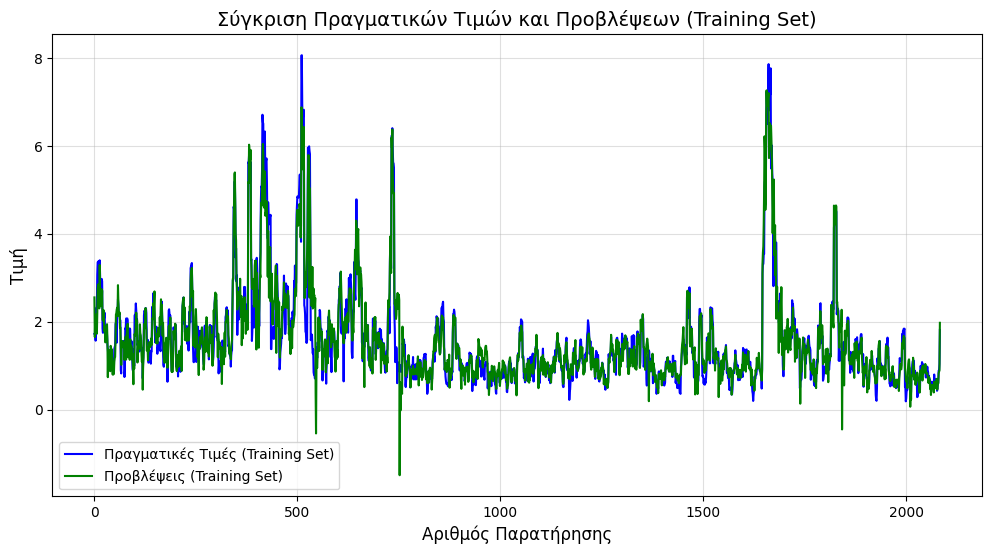

In [107]:
# Δημιουργία του διαγράμματος
plt.figure(figsize=(12, 6))

# Προβολή των πραγματικών τιμών (y_train) στο διάγραμμα
plt.plot(y_train.values, label="Πραγματικές Τιμές (Training Set)", color="blue", linestyle="-")

# Προβολή των προβλέψεων του μοντέλου (y_train_pred) στο διάγραμμα
plt.plot(y_train_pred, label="Προβλέψεις (Training Set)", color="green", linestyle="-")

# Προσθήκη τίτλου και ετικετών
plt.title("Σύγκριση Πραγματικών Τιμών και Προβλέψεων (Training Set)", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Τιμή", fontsize=12)

# Προσθήκη υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του διαγράμματος
plt.show()

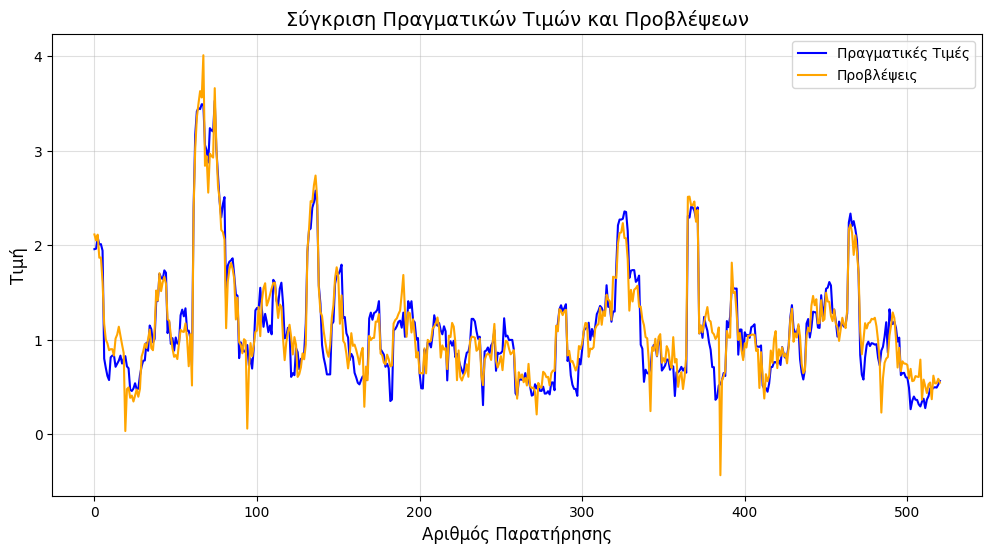

In [108]:
# Δημιουργία του διαγράμματος
plt.figure(figsize=(12, 6))

# Προβολή των πραγματικών τιμών (y_test) στο διάγραμμα
plt.plot(y_test.values, label="Πραγματικές Τιμές", color="blue", linestyle="-")

# Προβολή των προβλέψεων του μοντέλου (y_pred) στο διάγραμμα
plt.plot(y_pred, label="Προβλέψεις", color="orange", linestyle="-")

# Προσθήκη τίτλου και ετικετών
plt.title("Σύγκριση Πραγματικών Τιμών και Προβλέψεων", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Τιμή", fontsize=12)

# Προσθήκη υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του διαγράμματος
plt.show()

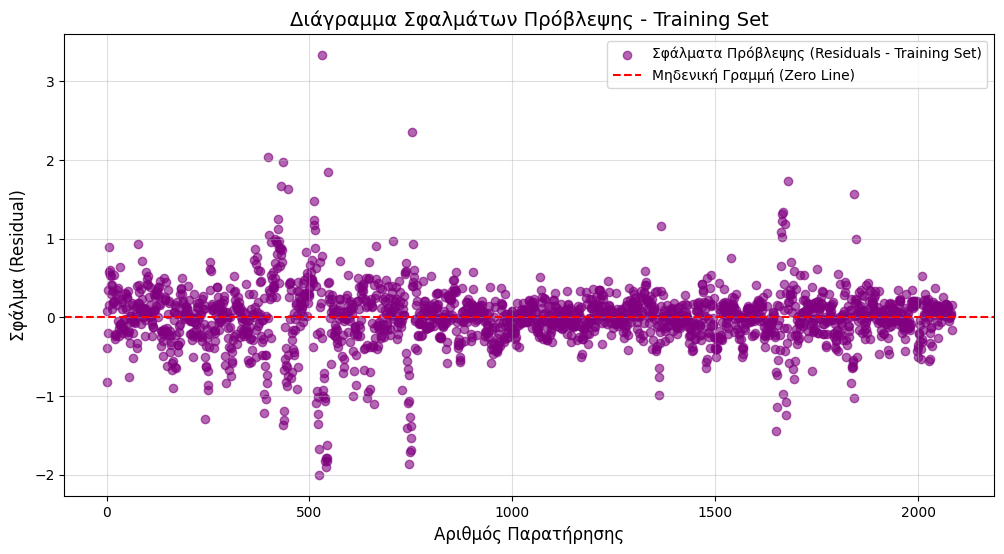

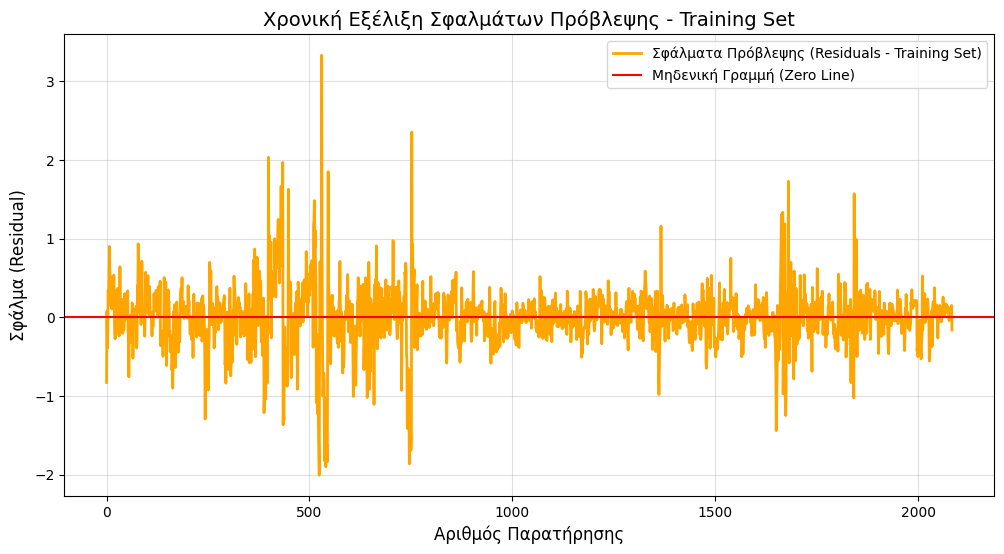

In [109]:
# Υπολογισμός των σφαλμάτων πρόβλεψης (Residuals) για το Training Set
residuals_train = y_train.values - y_train_pred

# Διάγραμμα Διασποράς για τα Σφάλματα Πρόβλεψης (Training Set)
plt.figure(figsize=(12, 6))

# Scatter Plot των Σφαλμάτων
plt.scatter(range(len(residuals_train)), residuals_train, color="purple", alpha=0.6,
            label="Σφάλματα Πρόβλεψης (Residuals - Training Set)")

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="--", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Διάγραμμα Σφαλμάτων Πρόβλεψης - Training Set", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

# Διάγραμμα Γραμμής για την Εξέλιξη των Σφαλμάτων (Training Set)
plt.figure(figsize=(12, 6))

# Line Plot για την Εξέλιξη των Σφαλμάτων
plt.plot(residuals_train, color="orange", label="Σφάλματα Πρόβλεψης (Residuals - Training Set)", linewidth=2)

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="-", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Χρονική Εξέλιξη Σφαλμάτων Πρόβλεψης - Training Set", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση Πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

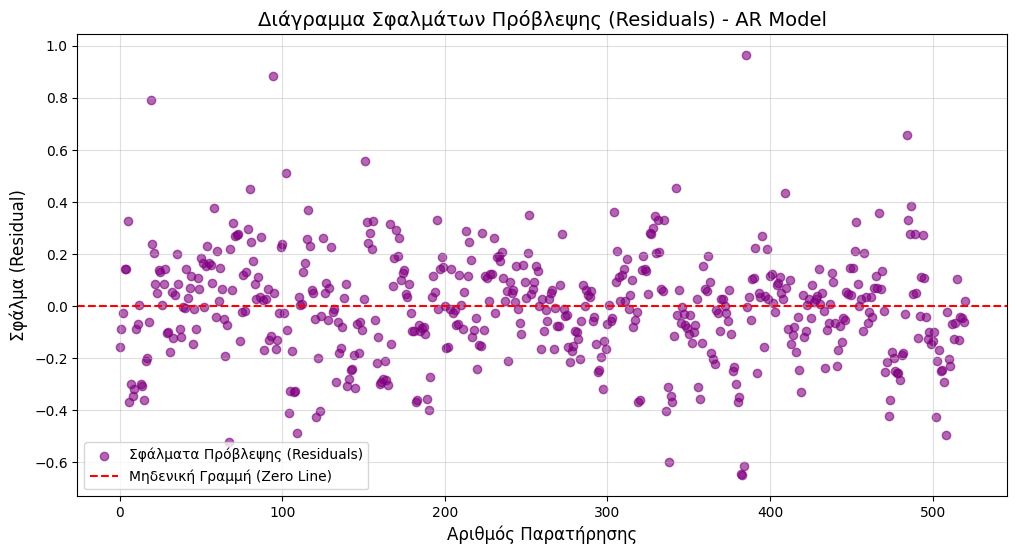

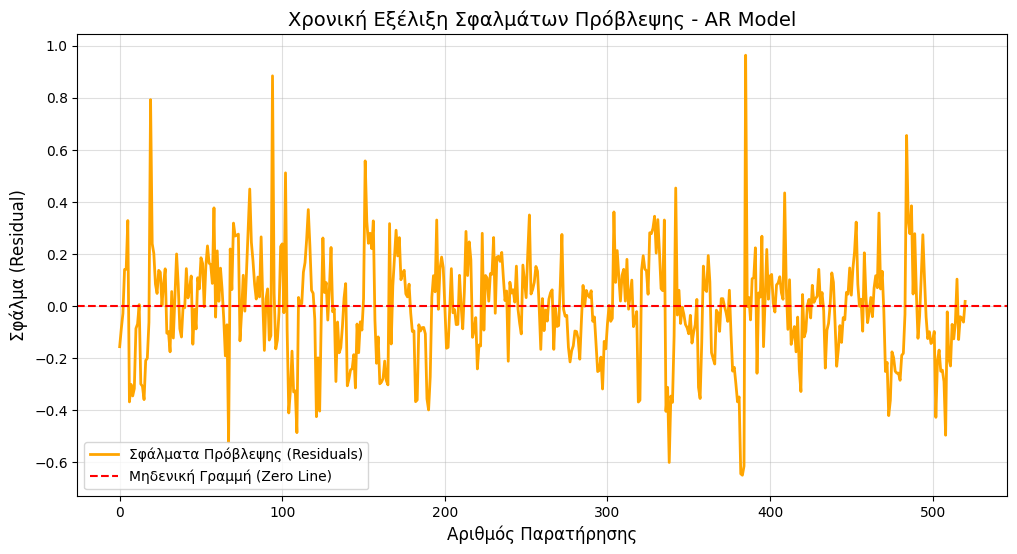

In [110]:
# Υπολογισμός των σφαλμάτων πρόβλεψης (Residuals)
residuals = y_test.values - y_pred

# Διάγραμμα Διασποράς για τα Σφάλματα Πρόβλεψης
plt.figure(figsize=(12, 6))

# Scatter Plot των Σφάλμάτων
plt.scatter(range(len(residuals)), residuals, color="purple", alpha=0.6, label="Σφάλματα Πρόβλεψης (Residuals)")

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="--", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Διάγραμμα Σφαλμάτων Πρόβλεψης (Residuals) - AR Model", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

# Διάγραμμα Γραμμής για την Εξέλιξη των Σφαλμάτων
plt.figure(figsize=(12, 6))

# Line Plot για την Εξέλιξη των Σφαλμάτων
plt.plot(residuals, color="orange", label="Σφάλματα Πρόβλεψης (Residuals)", linewidth=2)

# Χωριστή γραμμή για το μηδέν (Zero Line)
plt.axhline(y=0, color="red", linestyle="--", label="Μηδενική Γραμμή (Zero Line)")

# Προσθήκη τίτλου και ετικετών
plt.title("Χρονική Εξέλιξη Σφαλμάτων Πρόβλεψης - AR Model", fontsize=14)
plt.xlabel("Αριθμός Παρατήρησης", fontsize=12)
plt.ylabel("Σφάλμα (Residual)", fontsize=12)

# Προσθήκη Υπομνήματος
plt.legend()

# Εμφάνιση Πλέγματος
plt.grid(alpha=0.4)

# Εμφάνιση του Διαγράμματος
plt.show()

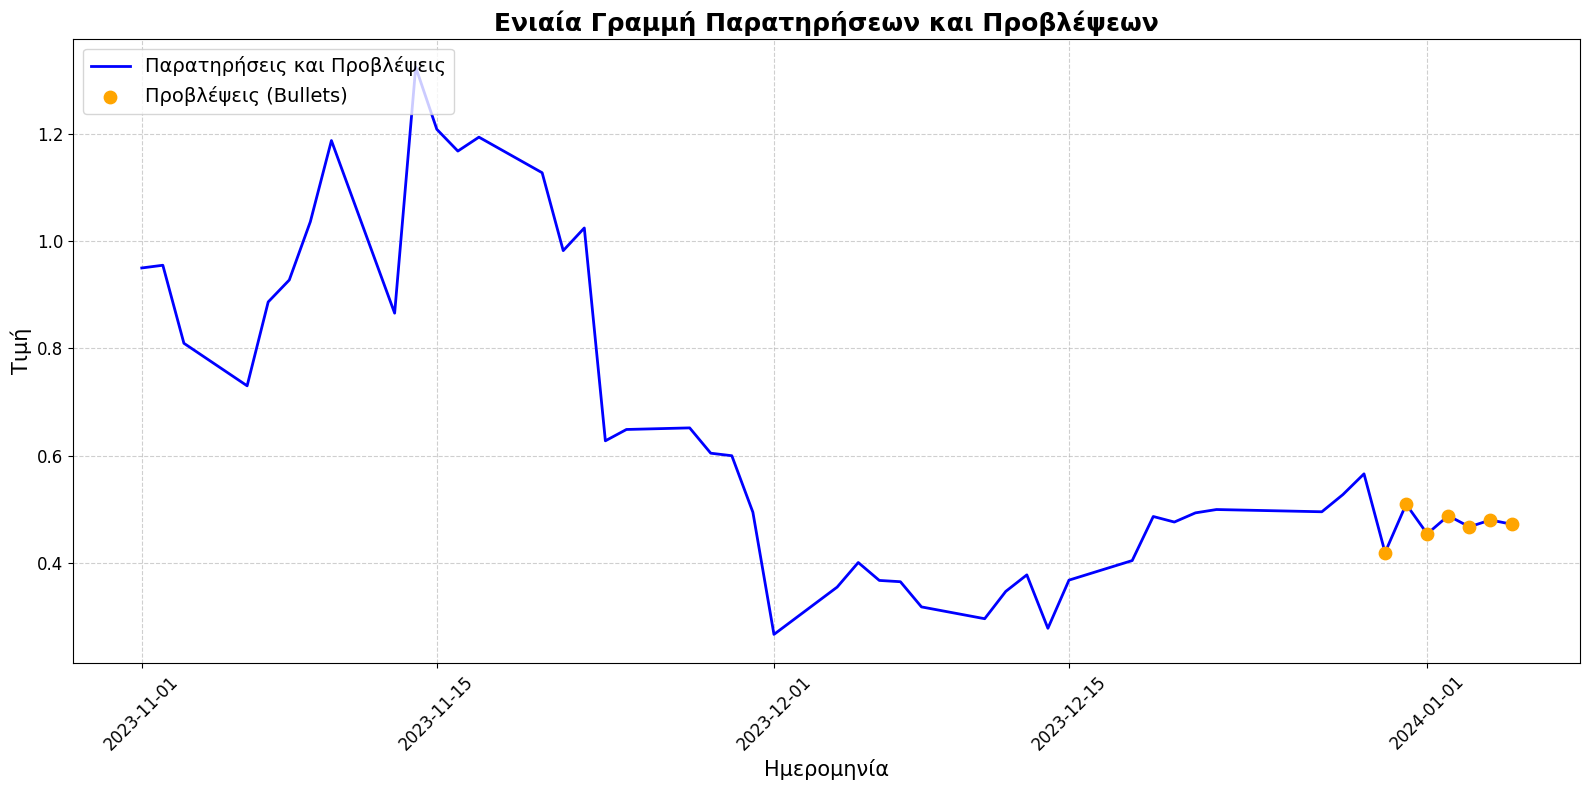

In [111]:
# Φιλτράρισμα του Test Set για δεδομένα από το 2023-11-01 και μετά
test_data_filtered = test_data[test_data.index >= "2023-11-01"]

# Φιλτράρισμα των Προβλέψεων για αυτές τις ημερομηνίες
predictions_filtered = predictions_df[predictions_df['Date'] >= "2023-11-01"].set_index('Date')

# Δημιουργία ενιαίου DataFrame για Παρατηρήσεις και Προβλέψεις
# Αντιγραφή δεδομένων Test Set και προσθήκη Προβλέψεων στις κατάλληλες θέσεις
test_data_with_predictions = test_data_filtered.copy()
for date, value in predictions_filtered['Prediction'].items():  # Χρήση της items() αντί για iteritems()
    test_data_with_predictions.loc[date] = value


# Ταξινόμηση δεδομένων με βάση την ημερομηνία
test_data_with_predictions.sort_index(inplace=True)

# Διάγραμμα: Ενιαία μπλε γραμμή και Προβλέψεις με Bullets
plt.figure(figsize=(16, 8))

# Ενιαία Γραμμή για Παρατηρήσεις και Προβλέψεις
plt.plot(test_data_with_predictions.index, test_data_with_predictions[dependent_var],
         linestyle='-', color="blue", linewidth=2, label="Παρατηρήσεις και Προβλέψεις")

# Bullets για τις Προβλέψεις - Τοποθετούνται πάνω στη μπλε γραμμή
plt.scatter(predictions_filtered.index, predictions_filtered['Prediction'],
            color="orange", label="Προβλέψεις (Bullets)", s=80, zorder=3)

# Προσθήκη τίτλων, υπόμνημα και αξόνων
plt.title("Ενιαία Γραμμή Παρατηρήσεων και Προβλέψεων", fontsize=18, fontweight='bold')
plt.xlabel("Ημερομηνία", fontsize=15)
plt.ylabel("Τιμή", fontsize=15)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=14, loc="upper left")

# Βελτιστοποίηση διάταξης
plt.tight_layout()

# Εμφάνιση διαγράμματος
plt.show()

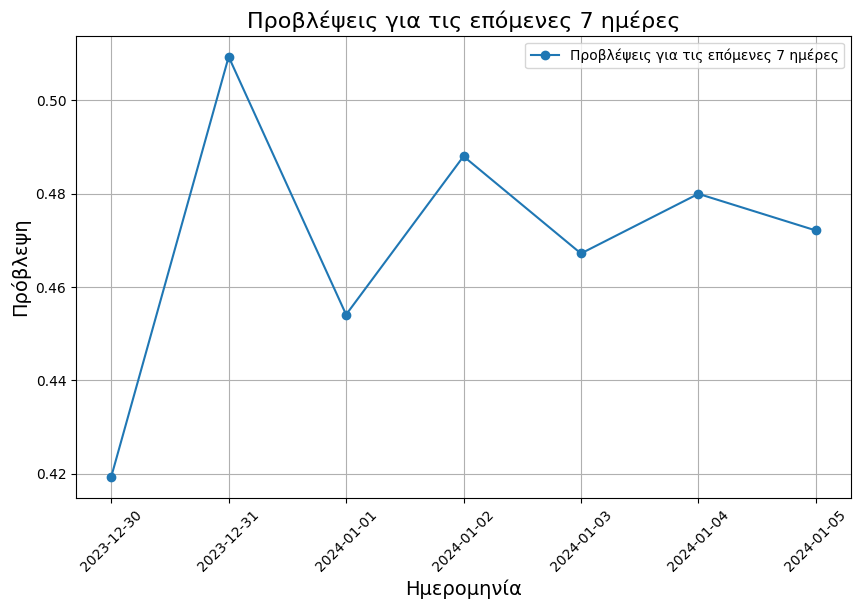

In [112]:
# Διάγραμμα Προβλέψεων
plt.figure(figsize=(10, 6))
plt.plot(predictions_df['Date'], predictions_df['Prediction'], marker='o', label="Προβλέψεις για τις επόμενες 7 ημέρες",
         linestyle='-')

# Προσθήκη τίτλων, ετικετών και υπόμνημα
plt.title("Προβλέψεις για τις επόμενες 7 ημέρες", fontsize=16)
plt.xlabel("Ημερομηνία", fontsize=14)
plt.ylabel("Πρόβλεψη", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

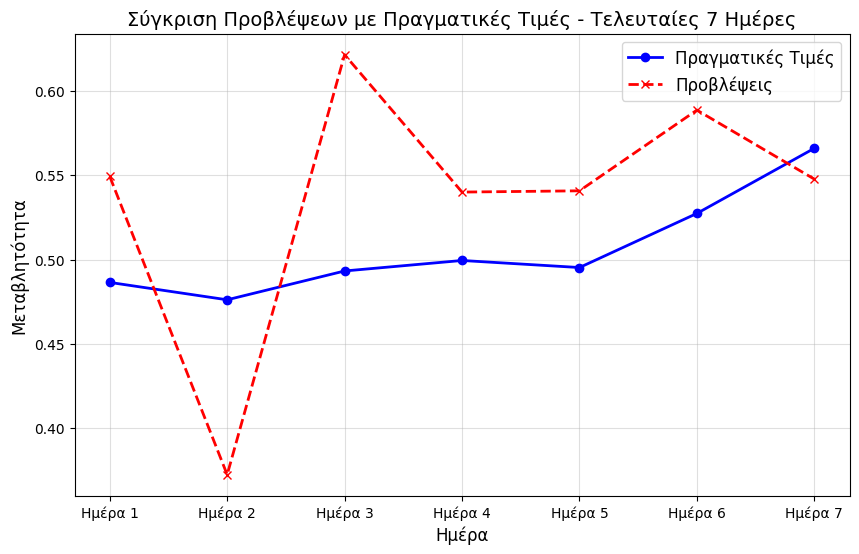

In [113]:
# Επιλέγουμε τα δεδομένα μόνο για τις τελευταίες 7 παρατηρήσεις
actual_last_7 = y_test.values[-7:]  # Οι πραγματικές τιμές για τις τελευταίες 7 ημέρες
predicted_last_7 = y_pred[-7:]  # Οι προβλέψεις για τις τελευταίες 7 ημέρες

# Δημιουργία διαγράμματος
plt.figure(figsize=(10, 6))

# Οπτικοποίηση των πραγματικών τιμών (τελευταίες 7 ημέρες)
plt.plot(range(1, 8), actual_last_7, label='Πραγματικές Τιμές', color='blue', linestyle='-', marker='o', linewidth=2)

# Οπτικοποίηση των προβλέψεων (τελευταίες 7 ημέρες)
plt.plot(range(1, 8), predicted_last_7, label='Προβλέψεις', color='red', linestyle='--', marker='x', linewidth=2)

# Προσθήκη τίτλου και ετικετών
plt.title('Σύγκριση Προβλέψεων με Πραγματικές Τιμές - Τελευταίες 7 Ημέρες', fontsize=14)
plt.xlabel('Ημέρα', fontsize=12)
plt.xticks(range(1, 8), labels=[f'Ημέρα {i}' for i in range(1, 8)])  # Ονόματα για τις τελευταίες 7 ημέρες
plt.ylabel('Μεταβλητότητα', fontsize=12)

# Προσθήκη πλέγματος
plt.grid(alpha=0.4)

# Προσθήκη υπομνήματος
plt.legend(fontsize=12)

# Εμφάνιση του διαγράμματος
plt.show()